# Support Vector Machine

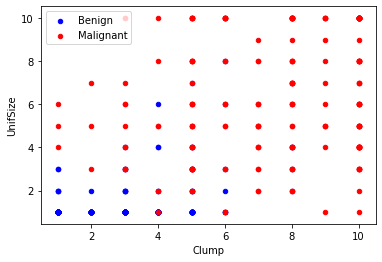

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('cell_samples.csv')
# data.columns gives the name of the columns
# data[column].value_counts() - no. of terms with their count

#Separating benign data
b_data = data[data['Class']==2][:200]
m_data = data[data['Class']==4][:200]

#this type of plotting is used when two different graphs are to be plotted in one graph
axes = b_data.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
graph = m_data.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=axes)
plt.show()

#DATA CLEANING
#data.dtypes - It explains data types of our data to make all numeric int type only to work with
#Here datatype of BareNuc has object datatype so we need to convert it to numeric.
data = data[pd.to_numeric(data.BareNuc,errors='coerce').notnull()]
data.BareNuc = data.BareNuc.astype('int')
#Now all data types are set to numeric only
#to be more clear visit NORMALIZATION on our site.

In [2]:
#take necessary features to train
features = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#Now can easily work on dependent and independent arrays
X = np.asarray(features)
y = np.asarray(data['Class'])

In [3]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=4)

In [4]:
# Standarize features
#It transform the data into a balance at nearer to 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(Xtrain)

In [5]:
#Prepare Model
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
#where gamma is kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ which is set at auto, uses 1 / n_features
classifier.fit(Xtrain,ytrain)
y_pred = classifier.predict(Xtest)

In [6]:
#result
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

